<h2 style="text-align: center;">
Up-to-date Heart Attack Analysis
</h2>


#### Recognizing Variables in Dataset

| Feature   | Description                                                                                           |
|-----------|-------------------------------------------------------------------------------------------------------|
| **Age**   | Age of the patient                                                                                    |
| **Sex**   | Sex of the patient                                                                                   |
| **exang** | Exercise-induced angina (1 = yes; 0 = no)                                                             |
| **ca**    | Number of major vessels (0–3)                                                                         |
| **cp**    | Chest pain type:<br>• 1 = typical angina<br>• 2 = atypical angina<br>• 3 = non-anginal pain<br>• 4 = asymptomatic |
| **trtbps**| Resting blood pressure                                                                                |
| **chol**  | Serum cholesterol (mg/dl) fetched via BMI sensor                                                      |
| **fbs**   | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)                                                 |
| **rest_ecg** | Resting electrocardiographic results:<br>• 0 = normal<br>• 1 = ST-T wave abnormality<br>• 2 = probable/definite left ventricular hypertrophy |
| **thalach**| Maximum heart rate achieved                                                                         |
| **target** | 0 = less chance of heart attack; 1 = more chance of heart attack                                      |


In [9]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("heart.csv")

In [13]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [15]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
new_columns = ["age","sex","cp","trtbps","chol","fbs","rest_ecg","thalach","exang","oldspeak","slope","ca","thal","target"]

In [19]:
df.columns = new_columns

In [21]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldspeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
df.shape

(303, 14)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldspeak  303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Examining missing values

In [30]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldspeak    0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [34]:
isnull_number = []
for i in df.columns:
    x=df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number,index=df.columns,columns=["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldspeak,0


<Axes: >

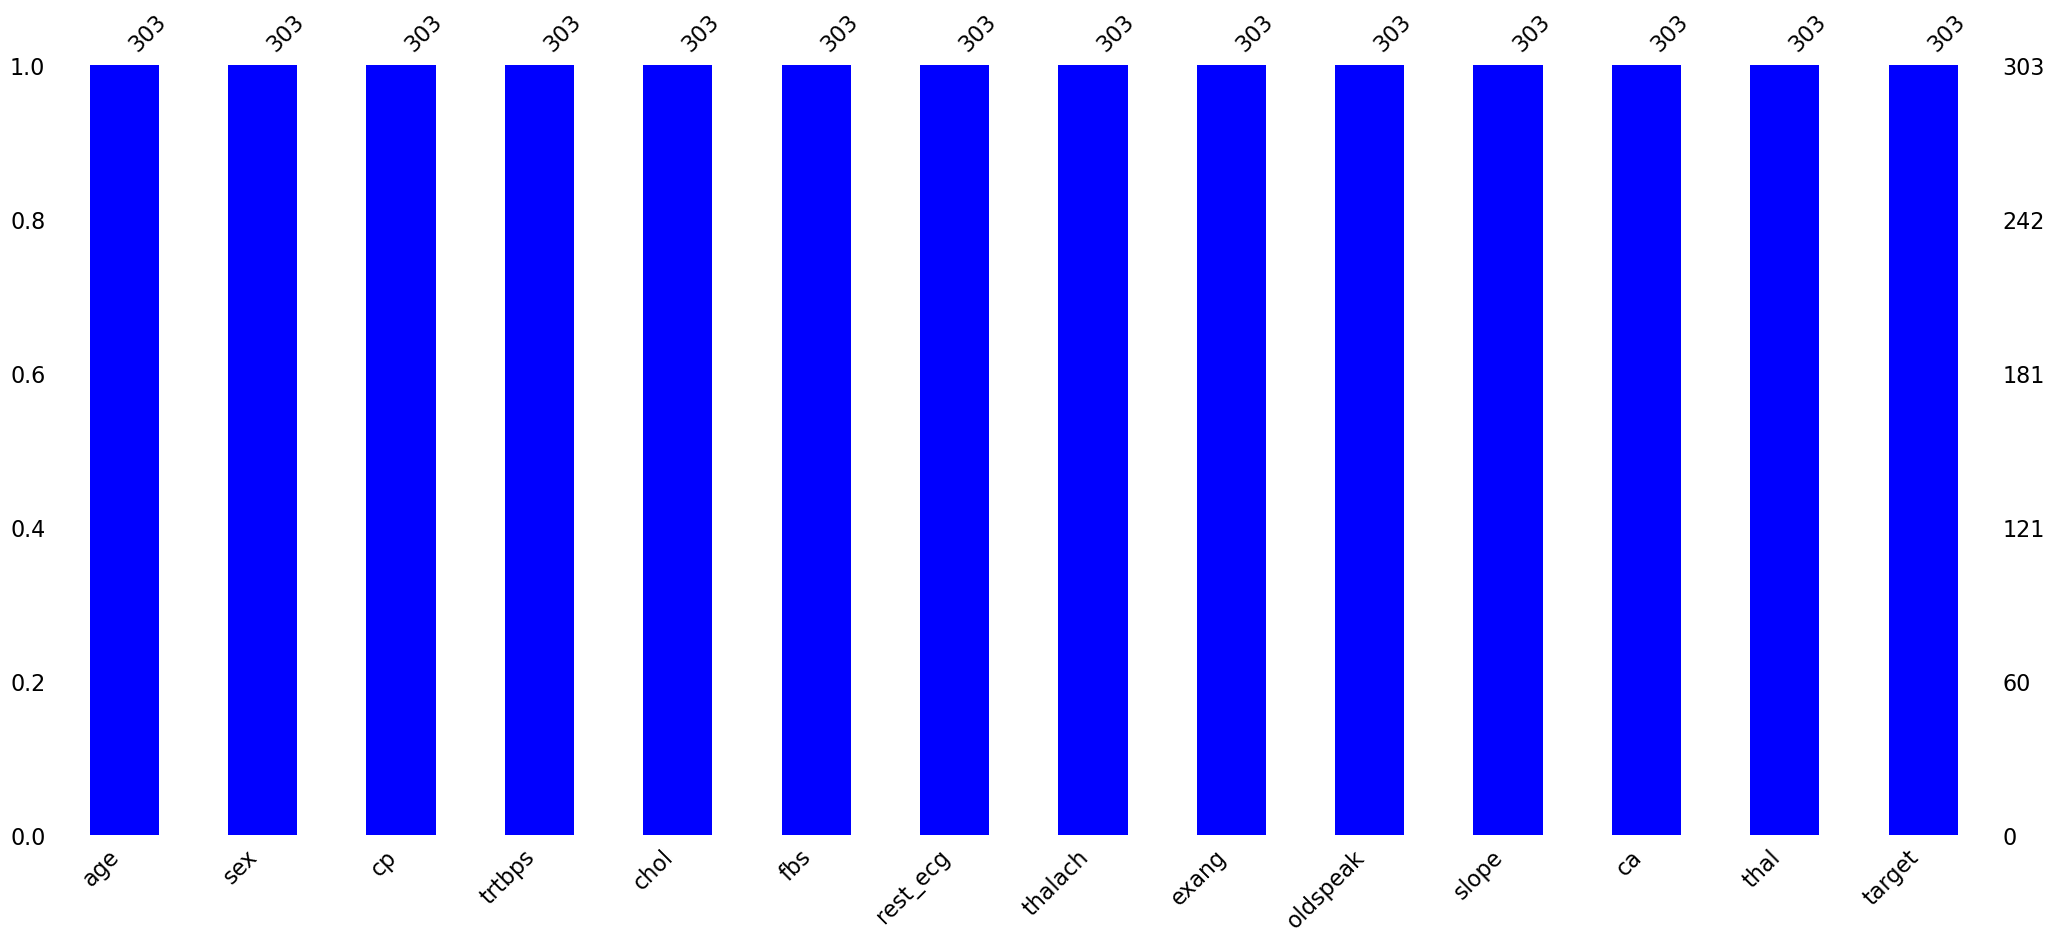

In [36]:
import missingno
missingno.bar(df,color="b")

#### Examining Unique Values

In [39]:
df["cp"].value_counts().count()

4

In [43]:
unique_number = []
for i in df.columns:
    x=df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number,index=df.columns,columns=["Total Unique Values"])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldspeak,40
